In [1]:
#hide
import matplotlib as mpl
import numpy as np
from os import path, makedirs
from copy import copy
from math import factorial
from matplotlib import pyplot as plt
from numpy.random import rand as rnd
from numpy import newaxis as nax
from numpy import real_if_close as ric
from scipy.optimize import brentq
from sys import exit as se, argv

In [2]:
#hide
from sys import path as syspath
syspath.insert(0, '../topological_mott_insulator')
from restricted import *
from IPython import display

# Finding MF Hamiltonian ground-states in k-space

# Fixed-point search, single V1-V2 set

We perform three simple self-consistent runs of the fixed-point search, for different values of V1 and V2.
For these values, the system is expected to be, respectively, in a site-nematic insulator, a stripe insulator and in a quantum anomalous Hall phase.

In [3]:
# site-nematic phase, finite order parameter \rho_1 (same order parameter as \rho_4)
MyCl = mfcheckb()
V1,V2 = 5,1
MyCl.prepare_run(V1=V1,V2=V2)
MyCl.fixed_point_method()
MyCl.prt_postrun_data()

Running V0=0.00, V1=5.00, V2=1.00, V3=0.00, V4=0.00
Correlation matrix initialized to random complex values.
Run concluded. Final number of iterations: 36 out of 100.
Correlation gradient: 4e-16
Free energy gradient: 2e-15
rho0  0
rho1  0.5751259494209898
rho2  0
rho3  0
rho4  0.691579283690337
xiQAH  0



In [4]:
# string phase, finite order parameter \rho_2
MyCl = mfcheckb()
V1,V2 = 3,4
MyCl.prepare_run(V1=V1,V2=V2)
MyCl.fixed_point_method()
MyCl.prt_postrun_data()

Running V0=0.00, V1=3.00, V2=4.00, V3=0.00, V4=0.00
Correlation matrix initialized to random complex values.
Run concluded. Final number of iterations: 31 out of 100.
Correlation gradient: 6e-16
Free energy gradient: 2e-15
rho0  0
rho1  0
rho2  0.7287935364613348
rho3  0
rho4  0
xiQAH  0



In [5]:
# topological phase, finite order parameter xi_{QAH}
MyCl = mfcheckb()
V1,V2 = 2.4,1.6
MyCl.prepare_run(V1=V1,V2=V2)
MyCl.fixed_point_method()
MyCl.prt_postrun_data()

Running V0=0.00, V1=2.40, V2=1.60, V3=0.00, V4=0.00
Correlation matrix initialized to random complex values.
Run concluded. Final number of iterations: 98 out of 100.
Correlation gradient: 1e-15
Free energy gradient: 7e-15
rho0  0
rho1  0
rho2  0
rho3  0
rho4  0
xiQAH  0.06784674349507666



In [6]:
# topological phase, finite order parameter xi_{QAH}
MyCl = mfcheckb()
V1,V2 = 2.4,1.6
MyCl.single_run(V1=V1,V2=V2)

Running V0=0.00, V1=2.40, V2=1.60, V3=0.00, V4=0.00
Correlation matrix initialized to random complex values.
Run concluded. Final number of iterations: 88 out of 100.
Correlation gradient: 7e-15
Free energy gradient: 7e-15
rho0  0
rho1  0
rho2  0
rho3  0
rho4  0
xiQAH  0.06784674349507665



# Phase diagram, finite V1 and V2, V3=0

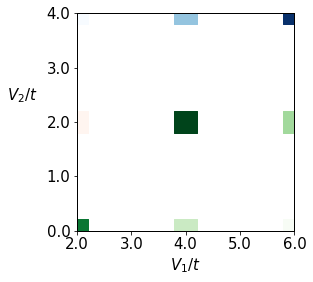

None

' The following two commands integrate all the operations shown above.\nMyCl.grid_run(Vgrid=Vgrid, V1V2region=V1V2region)\nMyCl.plot_phasediag_fixedV3(figsize=4, markersize=500).show()\n'

In [7]:
# Run a grid of points in the V1-V2 phase diagram.
MyCl = mfcheckb()

V3=0.0
verbose=False
Vgrid=7
V1V2region=[2,6,0,4]

MyCl.prepare_grid_run(V3=V3, verbose=verbose, Vgrid=Vgrid, V1V2region=V1V2region)
Vsarray_pool=MyCl.get_pool()
for counter, Vsarray in enumerate(Vsarray_pool):
    MyCl.prepare_run(Vsarray=Vsarray, verbose=verbose)
    MyCl.fixed_point_method()
    MyCl.prt_postrun_data(verbose=verbose)
    MyCl.store_grid_data(counter)
    MyPlt = MyCl.plot_phasediag_fixedV3(figsize=4, markersize=500)
    display.clear_output(wait=True)
    display.display(MyPlt.show())

# The following two commands integrate all the operations shown above.
# MyCl.grid_run(Vgrid=Vgrid, V1V2region=V1V2region)
# MyCl.plot_phasediag_fixedV3(figsize=4, markersize=500).show()

# Phase diagram, finite V1, V2 and V3.

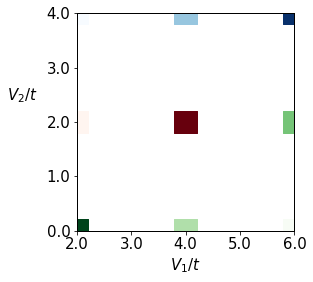

None

In [8]:
# Run a grid of points in the V1-V2 phase diagram.
MyCl = mfcheckb()

V3=0.5
verbose=False
V1V2region=[2,6,0,4]

MyCl.prepare_grid_run(V3=V3, verbose=verbose, Vgrid=Vgrid, V1V2region=V1V2region)
Vsarray_pool=MyCl.get_pool()
for counter, Vsarray in enumerate(Vsarray_pool):
    MyCl.prepare_run(Vsarray=Vsarray, verbose=verbose)
    MyCl.fixed_point_method()
    MyCl.prt_postrun_data(verbose=verbose)
    MyCl.store_grid_data(counter)
    MyPlt = MyCl.plot_phasediag_fixedV3(figsize=4, markersize=500)
    display.clear_output(wait=True)
    display.display(MyPlt.show())

# Phase diagram, effective Rydberg potential

Phase diagram.

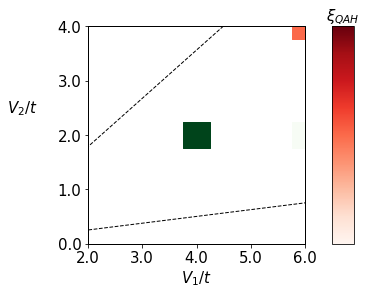

None

' The following two commands integrate all the operations shown above.\nMyCl.grid_run(verbose=verbose, Vgrid=Vgrid, V1V2region=V1V2region, rydberg=rydberg)\nMyCl.plot_phasediag_rydberg(figsize=4, markersize=500).show()\n'

In [9]:
# Run a grid of points in the V1-V2 phase diagram, with a Rydberg potential profile.
MyCl = mfcheckb()

verbose=False
V1V2region=[2,6,0,4]
rydberg=True

MyCl.prepare_grid_run(verbose=verbose, Vgrid=Vgrid, V1V2region=V1V2region, rydberg=rydberg)
Vsarray_pool=MyCl.get_pool(rydberg=rydberg)
for counter, Vsarray in enumerate(Vsarray_pool):
    MyCl.prepare_run(rydberg=rydberg, Vsarray=Vsarray, verbose=verbose)
    if MyCl.sanity_check(rydberg=rydberg):
        MyCl.fixed_point_method()
        MyCl.prt_postrun_data(verbose=verbose)
    MyCl.store_grid_data(counter)
    MyPlt = MyCl.plot_phasediag_rydberg(figsize=4, markersize=700)
    display.clear_output(wait=True)
    display.display(MyPlt.show())

''' The following two commands integrate all the operations shown above.
MyCl.grid_run(verbose=verbose, Vgrid=Vgrid, V1V2region=V1V2region, rydberg=rydberg)
MyCl.plot_phasediag_rydberg(figsize=4, markersize=500).show()
'''